<a href="https://colab.research.google.com/github/VijayNale/Malaria-Detection-master/blob/master/Malaria_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**### Text weather GPU working**


In [16]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

## which GPU we are using

In [4]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17997252972505699363, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 8590434492243324720
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 2558942124441924130
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14912199066
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12556214430452930385
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!pip install -q keras 

In [0]:

# dataset has blood test 
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt



In [0]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/Colab Notebooks/cell_images/Train'
valid_path = '/content/drive/My Drive/Colab Notebooks/cell_images/Test'




In [0]:
# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)  #3 means RGB(red green black) image 

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

  # useful for getting number of classes
folders = glob('/content/drive/My Drive/Colab Notebooks/cell_images/Train/*')
  



In [20]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)  #softmax is activation function to same as sigmoid , to predict bet 0 to 1

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)




Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [21]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/cell_images/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/cell_images/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')




Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [43]:
# fit the model : 1 hr time to build
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

"""
Epoch 1/10
32/32 [==============================] - 13s 395ms/step - loss: 0.1465 - acc: 0.9415 - val_loss: 0.5919 - val_acc: 0.7950
Epoch 2/10
32/32 [==============================] - 11s 352ms/step - loss: 0.1469 - acc: 0.9482 - val_loss: 0.4120 - val_acc: 0.8300
Epoch 3/10
32/32 [==============================] - 11s 359ms/step - loss: 0.1273 - acc: 0.9531 - val_loss: 1.0583 - val_acc: 0.7250
Epoch 4/10
32/32 [==============================] - 11s 358ms/step - loss: 0.1461 - acc: 0.9415 - val_loss: 0.8447 - val_acc: 0.7450
Epoch 5/10
32/32 [==============================] - 12s 368ms/step - loss: 0.1297 - acc: 0.9472 - val_loss: 0.5081 - val_acc: 0.8050
Epoch 6/10
32/32 [==============================] - 11s 353ms/step - loss: 0.1014 - acc: 0.9648 - val_loss: 1.0177 - val_acc: 0.7200
Epoch 7/10
32/32 [==============================] - 11s 352ms/step - loss: 0.1305 - acc: 0.9493 - val_loss: 0.6202 - val_acc: 0.7700
Epoch 8/10
32/32 [==============================] - 11s 358ms/step - loss: 0.1540 - acc: 0.9406 - val_loss: 1.0635 - val_acc: 0.7400
Epoch 9/10
32/32 [==============================] - 11s 358ms/step - loss: 0.0946 - acc: 0.9648 - val_loss: 0.8195 - val_acc: 0.7500
Epoch 10/10
32/32 [==============================] - 11s 358ms/step - loss: 0.0849 - acc: 0.9697 - val_loss: 1.0206 - val_acc: 0.7450
"""



Epoch 1/50
32/32 [==============================] - 13s 394ms/step - loss: 0.0808 - acc: 0.9699 - val_loss: 0.3355 - val_acc: 0.8800
Epoch 2/50
32/32 [==============================] - 12s 362ms/step - loss: 0.1237 - acc: 0.9463 - val_loss: 0.4739 - val_acc: 0.8500
Epoch 3/50
32/32 [==============================] - 12s 366ms/step - loss: 0.0676 - acc: 0.9717 - val_loss: 0.9914 - val_acc: 0.7400
Epoch 4/50
32/32 [==============================] - 11s 353ms/step - loss: 0.0662 - acc: 0.9805 - val_loss: 0.6719 - val_acc: 0.7950
Epoch 5/50
32/32 [==============================] - 11s 347ms/step - loss: 0.0751 - acc: 0.9717 - val_loss: 0.8001 - val_acc: 0.7800
Epoch 6/50
32/32 [==============================] - 12s 365ms/step - loss: 0.0662 - acc: 0.9736 - val_loss: 0.5829 - val_acc: 0.8150
Epoch 7/50
32/32 [==============================] - 11s 358ms/step - loss: 0.0594 - acc: 0.9775 - val_loss: 0.8785 - val_acc: 0.7450
Epoch 8/50
32/32 [==============================] - 11s 352ms/step - 

'\nEpoch 1/10\n32/32 [==============================] - 13s 395ms/step - loss: 0.1465 - acc: 0.9415 - val_loss: 0.5919 - val_acc: 0.7950\nEpoch 2/10\n32/32 [==============================] - 11s 352ms/step - loss: 0.1469 - acc: 0.9482 - val_loss: 0.4120 - val_acc: 0.8300\nEpoch 3/10\n32/32 [==============================] - 11s 359ms/step - loss: 0.1273 - acc: 0.9531 - val_loss: 1.0583 - val_acc: 0.7250\nEpoch 4/10\n32/32 [==============================] - 11s 358ms/step - loss: 0.1461 - acc: 0.9415 - val_loss: 0.8447 - val_acc: 0.7450\nEpoch 5/10\n32/32 [==============================] - 12s 368ms/step - loss: 0.1297 - acc: 0.9472 - val_loss: 0.5081 - val_acc: 0.8050\nEpoch 6/10\n32/32 [==============================] - 11s 353ms/step - loss: 0.1014 - acc: 0.9648 - val_loss: 1.0177 - val_acc: 0.7200\nEpoch 7/10\n32/32 [==============================] - 11s 352ms/step - loss: 0.1305 - acc: 0.9493 - val_loss: 0.6202 - val_acc: 0.7700\nEpoch 8/10\n32/32 [==============================] -

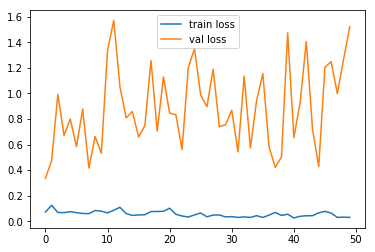

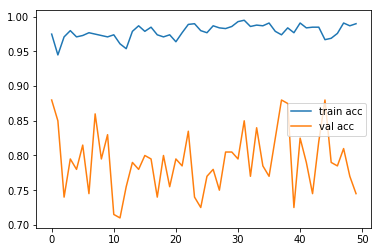

<Figure size 432x288 with 0 Axes>

In [44]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('/content/drive/My Drive/Colab Notebooks/cell_images/LossVal_loss')

# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('/content/drive/My Drive/Colab Notebooks/cell_images/AccVal_acc')



In [0]:
import tensorflow as tf

from keras.models import load_model

model.save('/content/drive/My Drive/Colab Notebooks/cell_images/model_vgg19.h5')


In [46]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
model = load_model('/content/drive/My Drive/Colab Notebooks/cell_images/model_vgg19.h5')
img = image.load_img('/content/drive/My Drive/Colab Notebooks/cell_images/Test/Parasitized/C184P145ThinF_IMG_20151203_103637_cell_178.png', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
classes  #predict prasities

array([[1., 0.]], dtype=float32)

In [0]:
img = image.load_img('/content/drive/My Drive/Colab Notebooks/cell_images/Test/Uninfected/C240ThinF_IMG_20151127_115328_cell_16.png', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)